Use balance dataset and perform the following:

Use preprocessing methods to clean the dataset.

Spit the dataset into Train and Test dataset, respectively.

Use train dataset to create a Decision tree model.

Use test set for making predictions.

Access the quality of your classification model.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing balance dataset
bal_df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Balance.csv',header=None)

In [3]:
#adding column labels to dataset
bal_df.columns=['class_name','l_weight','l_distance','r_weight','r_distance']
feature_columns=['l_weight','l_distance','r_weight','r_distance']

In [4]:
bal_df.head()

,class_name,l_weight,l_distance,r_weight,r_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
bal_df['class_name'].nunique()

3

In [8]:
#checking for null values in the dataset
bal_df.isnull().sum()

class_name    0
l_weight      0
l_distance    0
r_weight      0
r_distance    0
dtype: int64

In [9]:
#extracting features and target dataframe from the dataset
features_df=bal_df.iloc[:,1:].values
target_df=bal_df.iloc[:,0].values

In [10]:
#splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state = 10)

In [11]:
#using training set to create a decision tree model
bal_tree=DecisionTreeClassifier(criterion="gini",random_state=10)
bal_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [12]:
#predicting y values using testing set
y_pred=bal_tree.predict(X_test)

In [13]:
#calculating accuracy score of the model
acc=accuracy_score(y_test,y_pred)*100
print( "Accuracy of classification model is ",round(acc,4))

Accuracy of classification model is  76.5957


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


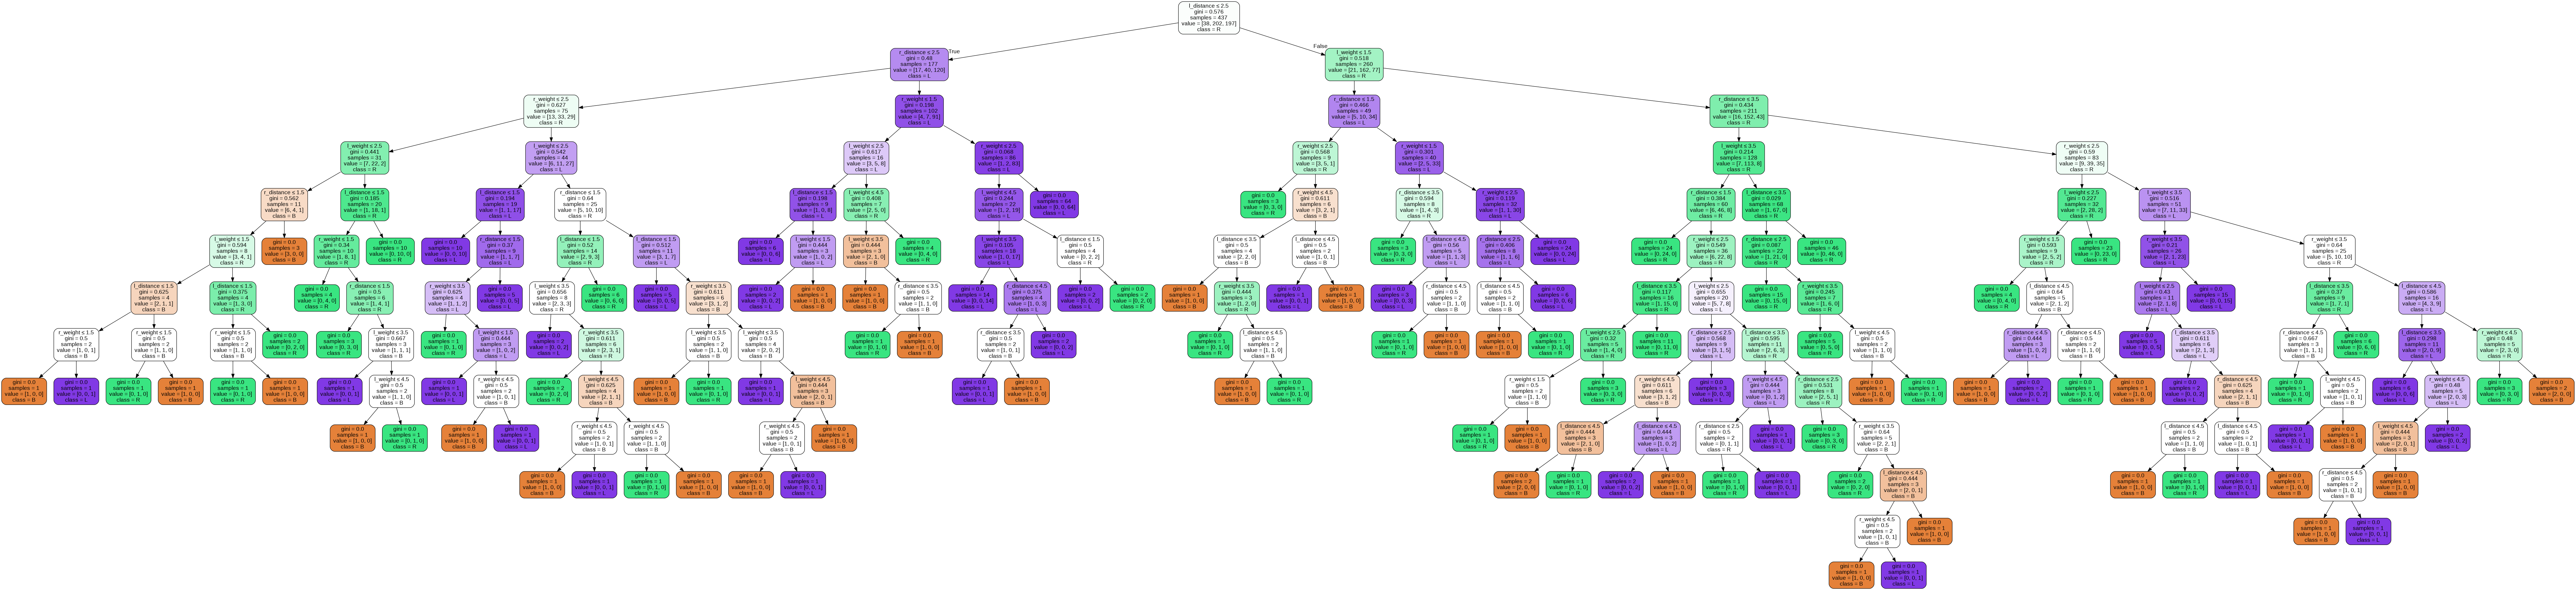

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data=StringIO()
export_graphviz(bal_tree, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names = feature_columns,class_names=['B','R','L'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('BalanceTree.png')
Image(graph.create_png())